# University of Toronto SCS3546 (Deep Learning) 

## Project - Style Transfer
## 2 August 2022
## Tony Sinn

Although fast style transfer networks are fast, they are limited to a preselected handful of
styles because a separate neural network must be trained for each style image. Arbitrary
Neural Artistic Stylization (ANAS) mitigates this limitation by using a style network
and transformer network. The style network learns how to break down an image into a 100-dimensional vector (or style vector) that represents its style. The transformer
network learns how to produce the final stylized image from the style vector and original
content image.

ANAS networks are the latest incarnation of fast style networks. ANAS are considered
better than NST and fast style transfer because they enable arbitrary style transfer in real
time. So they are faster than NST and more flexible than fast style transfer because they
automatically adapt to arbitrary new styles.
ANAS adds an adaptive instance normalization (AdaIN) layer that aligns the
mean and variance of the content features with those of the style features. ANAS
achieves speeds comparable to the fastest existing approaches without the restriction
of a predefined set of styles. ANAS also allows flexible user controls such as content-style
trade-off, style interpolation, and color and spatial controls with only a single
feedforward neural network pass

ANAS implementation of NST with an end-to-end
code experiment.

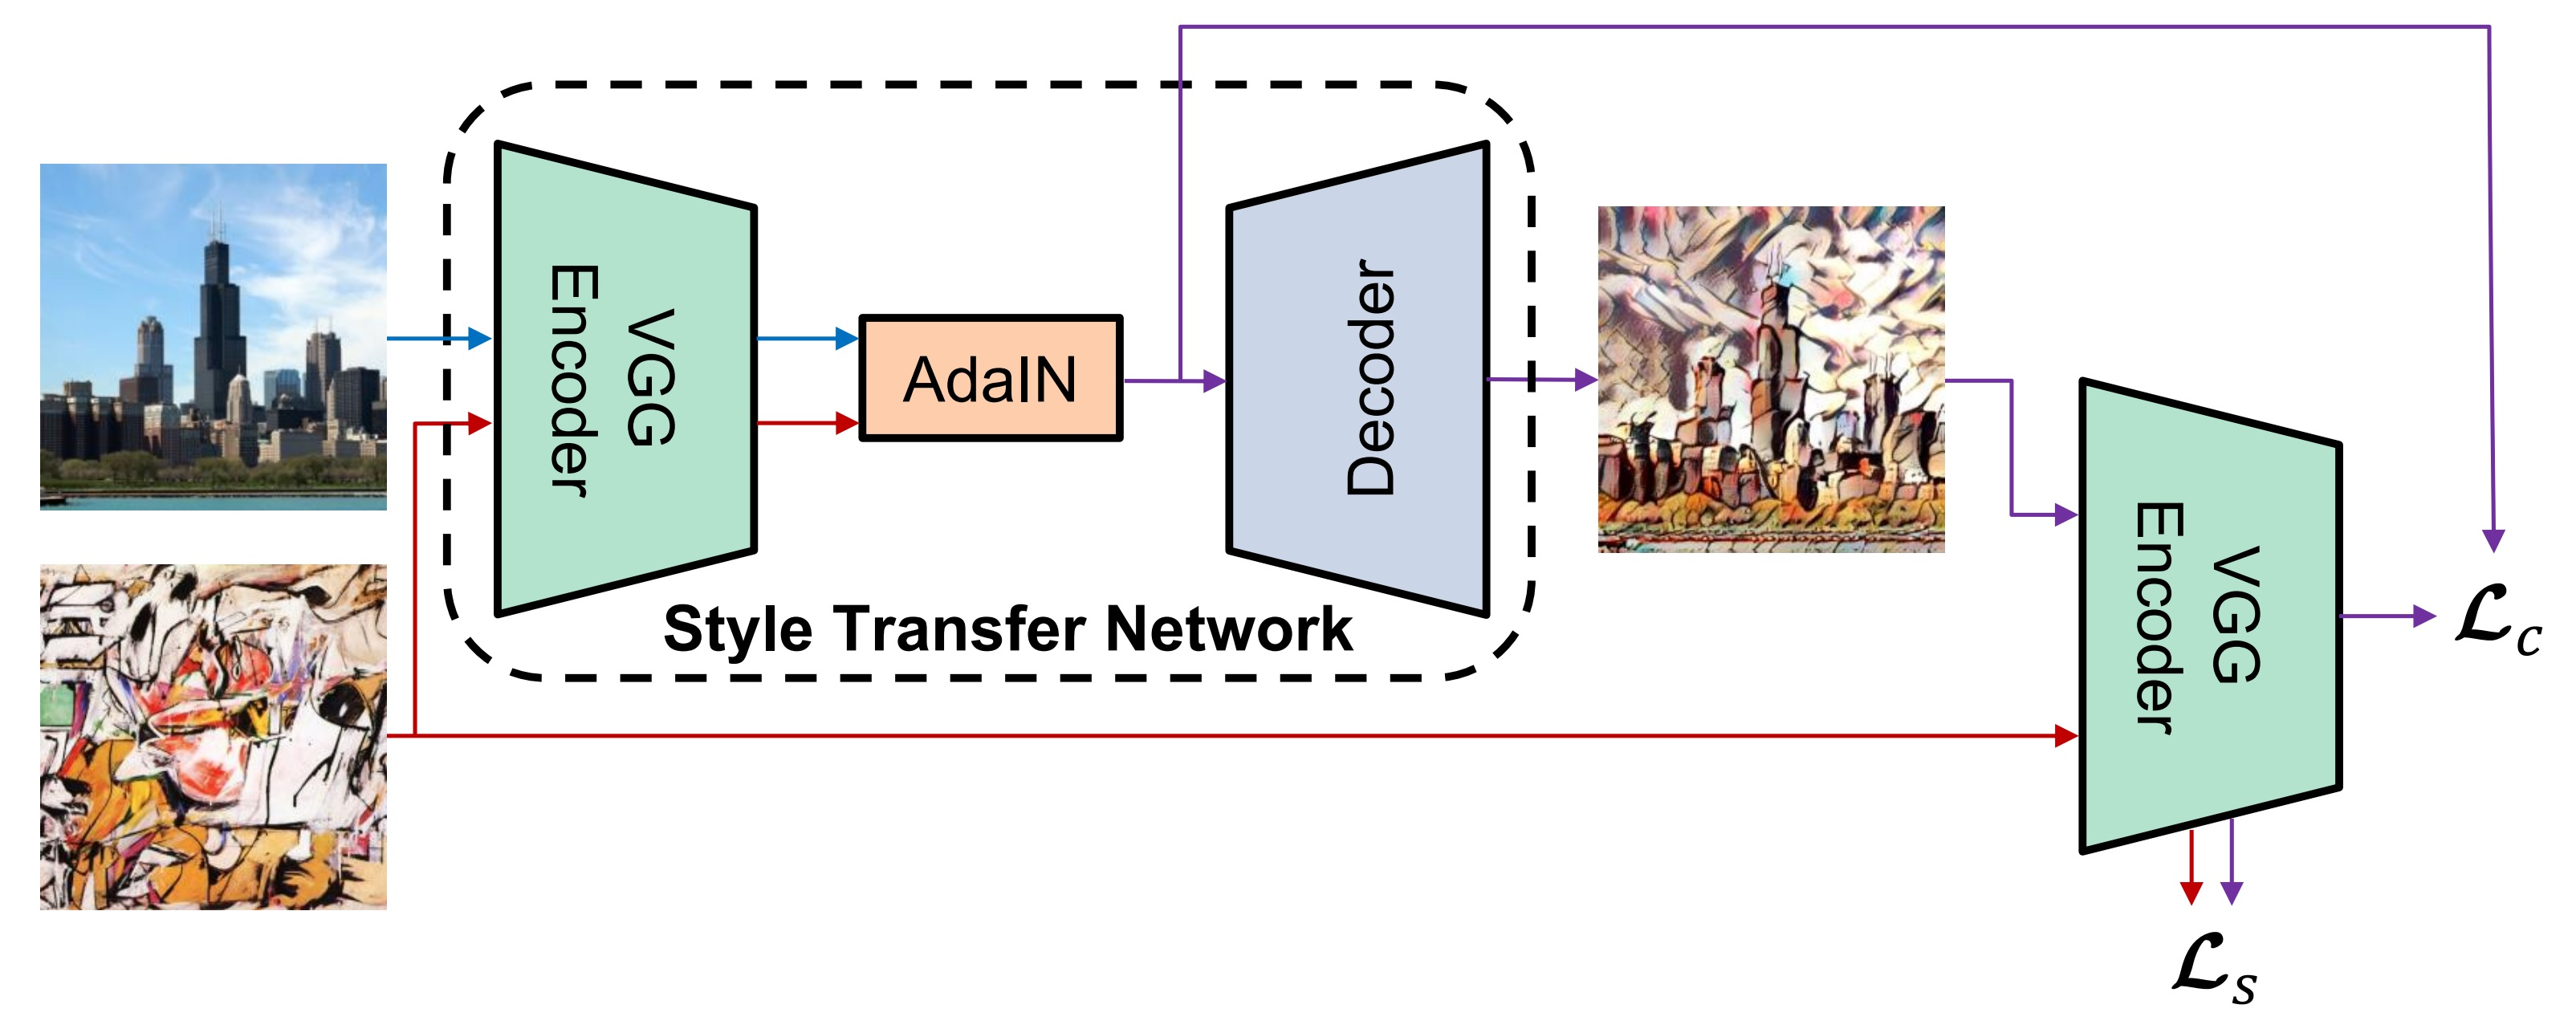

https://github.com/xunhuang1995/AdaIN-style

https://arxiv.org/pdf/1703.06868.pdf

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

from PIL import Image

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Model

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Image Preprocessing Functions

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img,channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis,:]
  return img

In [ ]:
def get_image(img_path):
  return Image.open(img_path)

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)
  plt.axis('off')    
  plt.imshow(image)
  if title:
    plt.title(title)

# Load Content Images

In [ ]:
content_path1 = 'gdrive/My Drive/_3546/Project/images/cn4.jpeg'
content_image1  = load_image(content_path1)
content_image1.shape



TensorShape([1, 408, 612, 3])

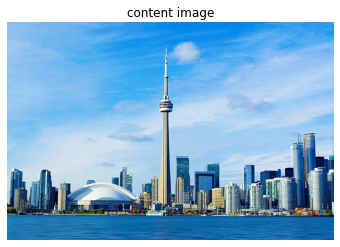

In [ ]:

#plt.imshow(np.squeeze(content_image1))
imshow(np.squeeze(content_image1),'content image')
plt.show()

# Load Style Images

In [ ]:
style_path1 ='gdrive/My Drive/_3546/Project/images/escher.jpeg'
style_image1 = load_image(style_path1)

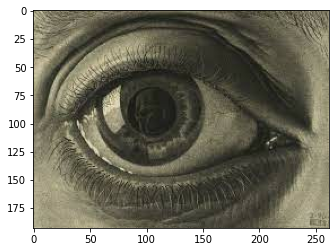

In [ ]:
style_image1.shape
plt.imshow(np.squeeze(style_image1))
plt.show()

In [ ]:
style_path2 ='gdrive/My Drive/_3546/Project/images/monet_bld.jpeg'
style_image2 = load_image(style_path2)

In [ ]:
style_path3 ='gdrive/My Drive/_3546/Project/images/teddy.jpeg'
style_image3 = load_image(style_path3)

In [ ]:
style_path4 ='gdrive/My Drive/_3546/Project/images/wave.jpg'
style_image4 = load_image(style_path4)

In [ ]:
style_path5 ='gdrive/My Drive/_3546/Project/images/picasso.jpg'
style_image5 = load_image(style_path5)

In [ ]:
style_path6 ='gdrive/My Drive/_3546/Project/images/VanGogh-Irises_1.jpg'
style_image6 = load_image(style_path6)

# Create the stylized images

In [ ]:
stylized_image1 = model(tf.constant(content_image1),tf.constant(style_image1))[0]
stylized_image2 = model(tf.constant(content_image1),tf.constant(style_image2))[0]
stylized_image3 = model(tf.constant(content_image1),tf.constant(style_image3))[0]
stylized_image4 = model(tf.constant(content_image1),tf.constant(style_image4))[0]
stylized_image5 = model(tf.constant(content_image1),tf.constant(style_image5))[0]
stylized_image6 = model(tf.constant(content_image1),tf.constant(style_image6))[0]


# Styled image 1

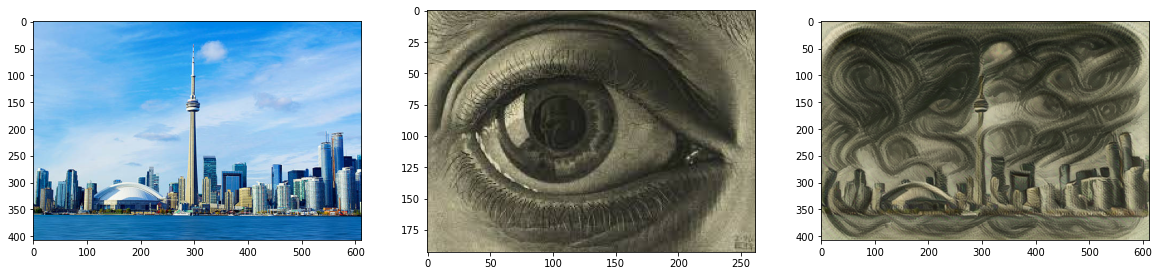

In [ ]:


f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image1));
s2 = axarr[2].imshow(np.squeeze(stylized_image1));
 



# Styled image 2

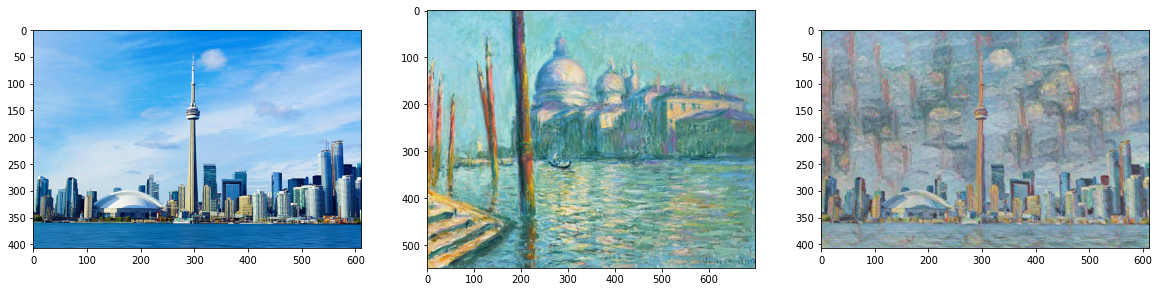

In [ ]:
f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image2));
s2 = axarr[2].imshow(np.squeeze(stylized_image2));
 

# Styled image 3

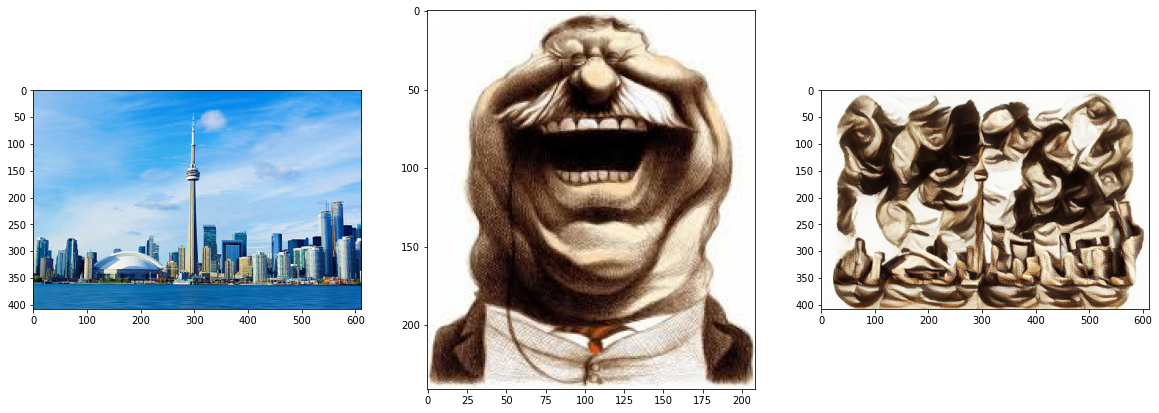

In [ ]:
f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image3));
s2 = axarr[2].imshow(np.squeeze(stylized_image3));
 

# Styled image 4

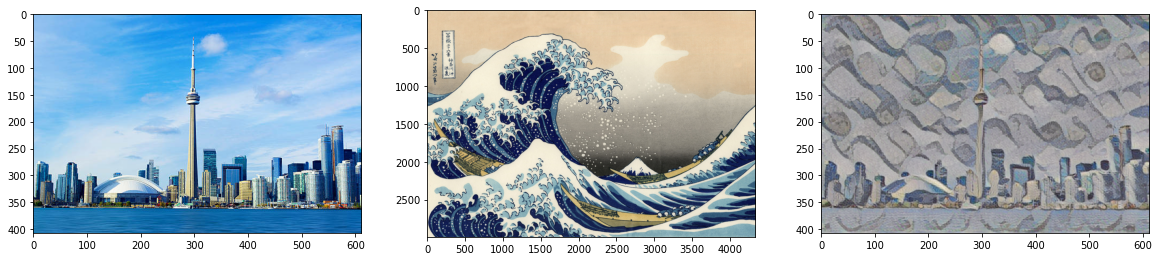

In [ ]:
f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image4));
s2 = axarr[2].imshow(np.squeeze(stylized_image4));
 

# Styled image 5

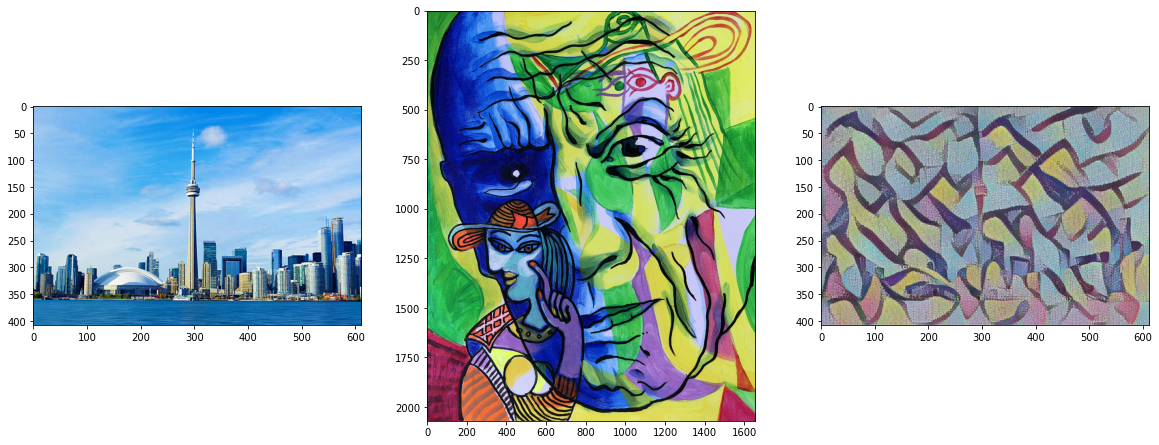

In [ ]:
f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image5));
s2 = axarr[2].imshow(np.squeeze(stylized_image5));
 

# Styled image 6

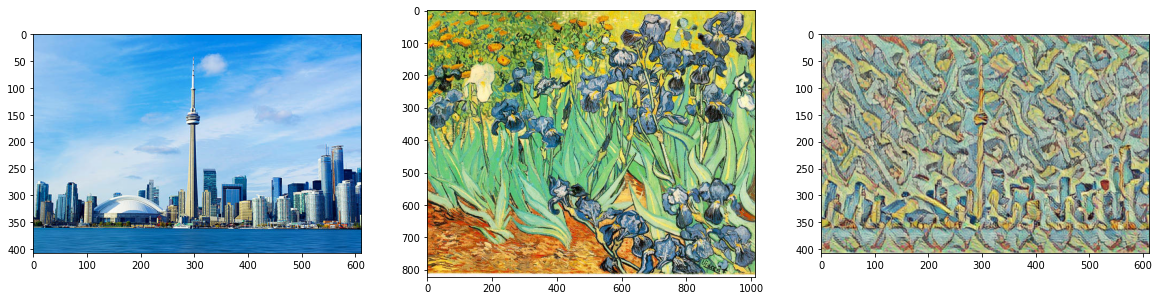

In [ ]:
f, axarr = plt.subplots(1,3, figsize = (20,20))
s0 = axarr[0].imshow(np.squeeze(content_image1)); 
s1 = axarr[1].imshow(np.squeeze(style_image6));
s2 = axarr[2].imshow(np.squeeze(stylized_image6));

END  - Arbitary Style Transfer